<a href="https://colab.research.google.com/github/Chelagat-Pauline-G/KNN-NAIVES-BAYES/blob/main/WEEK_9_IP_K_Nearest_Neighbours_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict whether the indidividuals on the titanic survived or not given the dataset.

### b) Defining the Metric for Success
Successfull identification of a mode with the best:
- Confusion Matrix as the name suggests gives us a matrix as output and describes the complete performance of the model.
- Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. 
- F1 Score is the Harmonic Mean between precision and recall. The range for F1 Score is [0, 1]. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

### c) Understanding the context 
The titanic and titanic2 data frames describe the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers.

### d) Recording the Experimental Design
The follwing is the order in which the project was carried out:

- Data sourcing
- External data validation
- Data claenaing and tidying up
- EDA
- Implementing the solution
- Building the models
- Challenging the solutions and follow up questions

### e) Data Relevance


## 2. Reading the Data

In [43]:
# Importing our libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [44]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = http://bit.ly/WineQualityDatasetSource
# ---
df= pd.read_csv('/content/train (5).csv')



## 3. Checking the Data

In [45]:
# Determining the no. of records in our dataset
#
df.shape

(891, 12)

In [46]:
# Previewing the top of our dataset
#
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Previewing the bottom of our dataset
# 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [48]:
# Checking whether each column has an appropriate datatype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
# A for loop has been used to print unique values for each column
for column in df.columns:
  print(column)
  #print(df[column].nunique())
  print(df[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

###Changing the column names

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [52]:
#Dropping columns we will not need.
df = df.drop(['passengerid', 'name', 'ticket','cabin'], axis = 1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Chaning the column data types

In [53]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [54]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['embarked'] = df['embarked'].astype('category').cat.codes
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Dealing with missing data

In [55]:
# Identifying the Missing Data
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [56]:
# Filling missing values in the sex column with mode
df.embarked.fillna(df.embarked.mode()[0], inplace = True)

# Filling missing values in the sex column with mode
df.age.fillna(df.age.mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

### Dealing with outleirs and anomalies

In [57]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

Text(0.5, 1.0, 'Checking for outliers using boxplots')

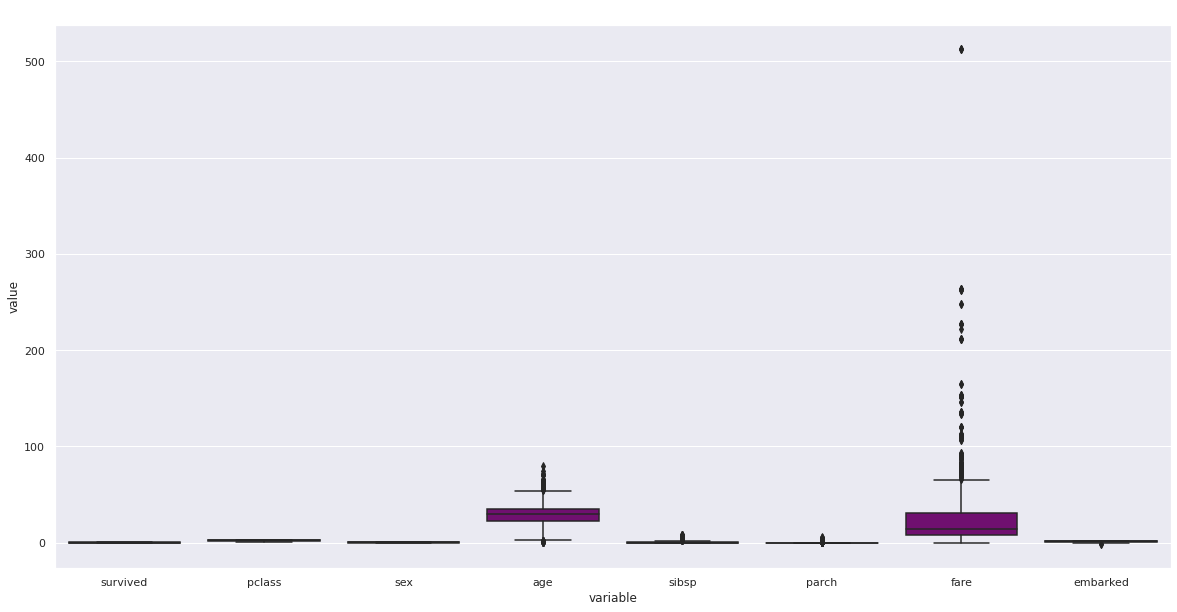

In [58]:
boxplot = pd.DataFrame(data = df, columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'])

plt.figure(figsize=(20,10))

sns.boxplot(x="variable", y="value", data=pd.melt(boxplot), color = 'purple').set_title('Checking for outliers using boxplots', fontsize= 15,  color='white')

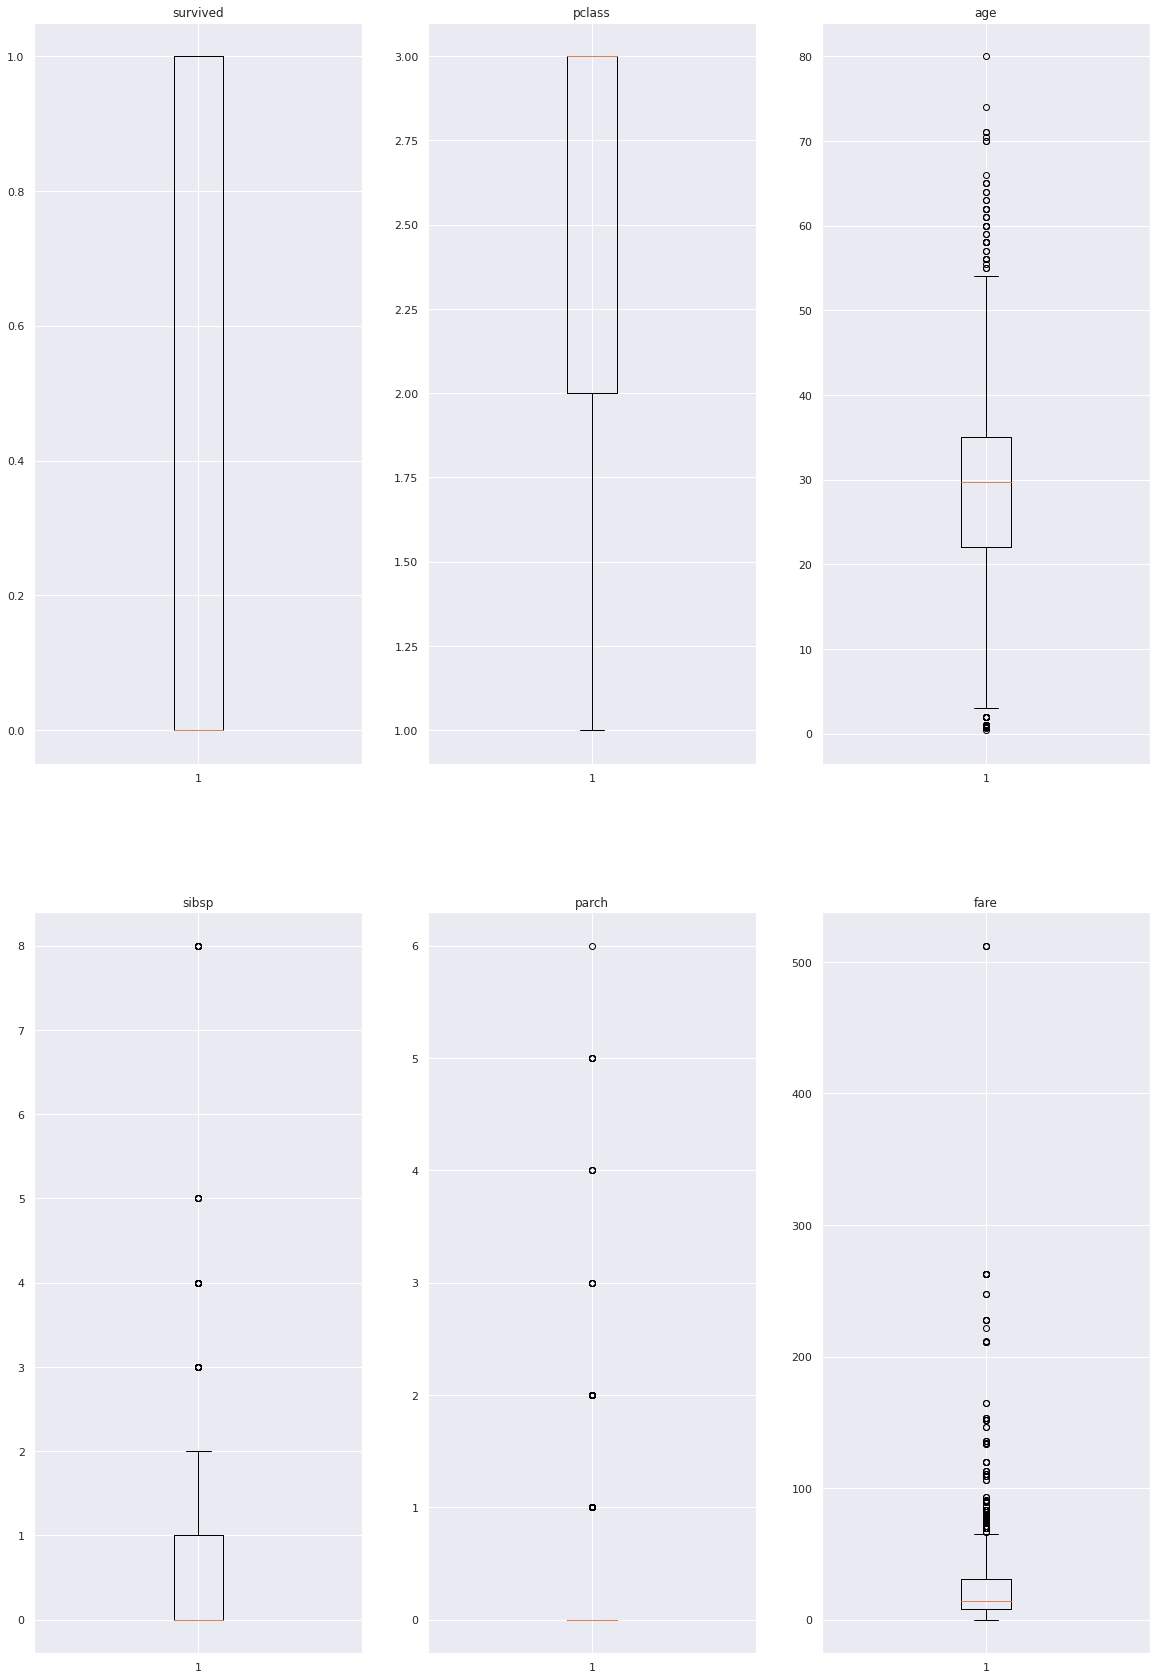

In [59]:
# Checking for Outliers
# save the column names onto a dictionary
columns_dict={ 'survived':1, 'pclass':2, 'age':3, 'sibsp':4, 'parch':5, 'fare':6}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(2,3,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

In [60]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [61]:
# #Dealing with outliers

print(f"Size of dataset with outliers: {df.shape}")
# dealing with outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers =df[((df < Q1 - 1.5 * IQR)| (df > Q3 + 1.5 * IQR)).any(axis=1)].index

count = df.iloc[outliers].survived.value_counts()
print(count)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("...................")

print(f"Size of dataset after removal of outliers: {df.shape}")


Size of dataset with outliers: (891, 8)
1    169
0    145
Name: survived, dtype: int64
...................
Size of dataset after removal of outliers: (577, 8)


In [62]:
#Checking for Anomalies

# find quartile ranges for the column sum of bluecars_taken
q1_life_e = df.quantile(.25)
q3_life_e = df.quantile(.75)#

# calculating inter-quartile range using values from above
iqr_life_e = q3_life_e - q1_life_e

# another way is to find quantiles using the percentiles from the numpy library
q1_l_e, q3_l_e = np.percentile(df, [25, 75]) 
# IQR
iqr_l_e = q3_l_e - q1_l_e

# compare if the two values are similar
print(iqr_life_e, iqr_l_e)

survived    1.000
pclass      1.000
sex         0.000
age         8.500
sibsp       0.000
parch       0.000
fare        8.075
embarked    0.000
dtype: float64 3.0


In [63]:
# More data cleaning procedures
#
df.shape

(577, 8)

In [64]:
df.survived.value_counts()  

0    404
1    173
Name: survived, dtype: int64




## 6. Exploratory Analysis

Measures of central tendancies.

In [65]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.0,577.000000,577.000000
mean,0.299827,2.502600,0.752166,29.742060,0.199307,0.0,14.926356,1.611785
std,0.458579,0.733909,0.432129,8.516997,0.445034,0.0,12.606521,0.718119
min,0.000000,1.000000,0.000000,5.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,2.000000,1.000000,24.000000,0.000000,0.0,7.775000,2.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.0,8.662500,2.000000
75%,1.000000,3.000000,1.000000,32.500000,0.000000,0.0,15.850000,2.000000
max,1.000000,3.000000,1.000000,54.000000,2.000000,0.0,61.175000,2.000000


In [66]:
df.skew()

survived    0.876051
pclass     -1.106396
sex        -1.171147
age         0.651129
sibsp       2.139041
parch       0.000000
fare        1.994894
embarked   -1.525588
dtype: float64

In [67]:
df.kurt()

survived   -1.236833
pclass     -0.272443
sex        -0.630613
age         0.527104
sibsp       3.899491
parch       0.000000
fare        3.478944
embarked    0.669851
dtype: float64

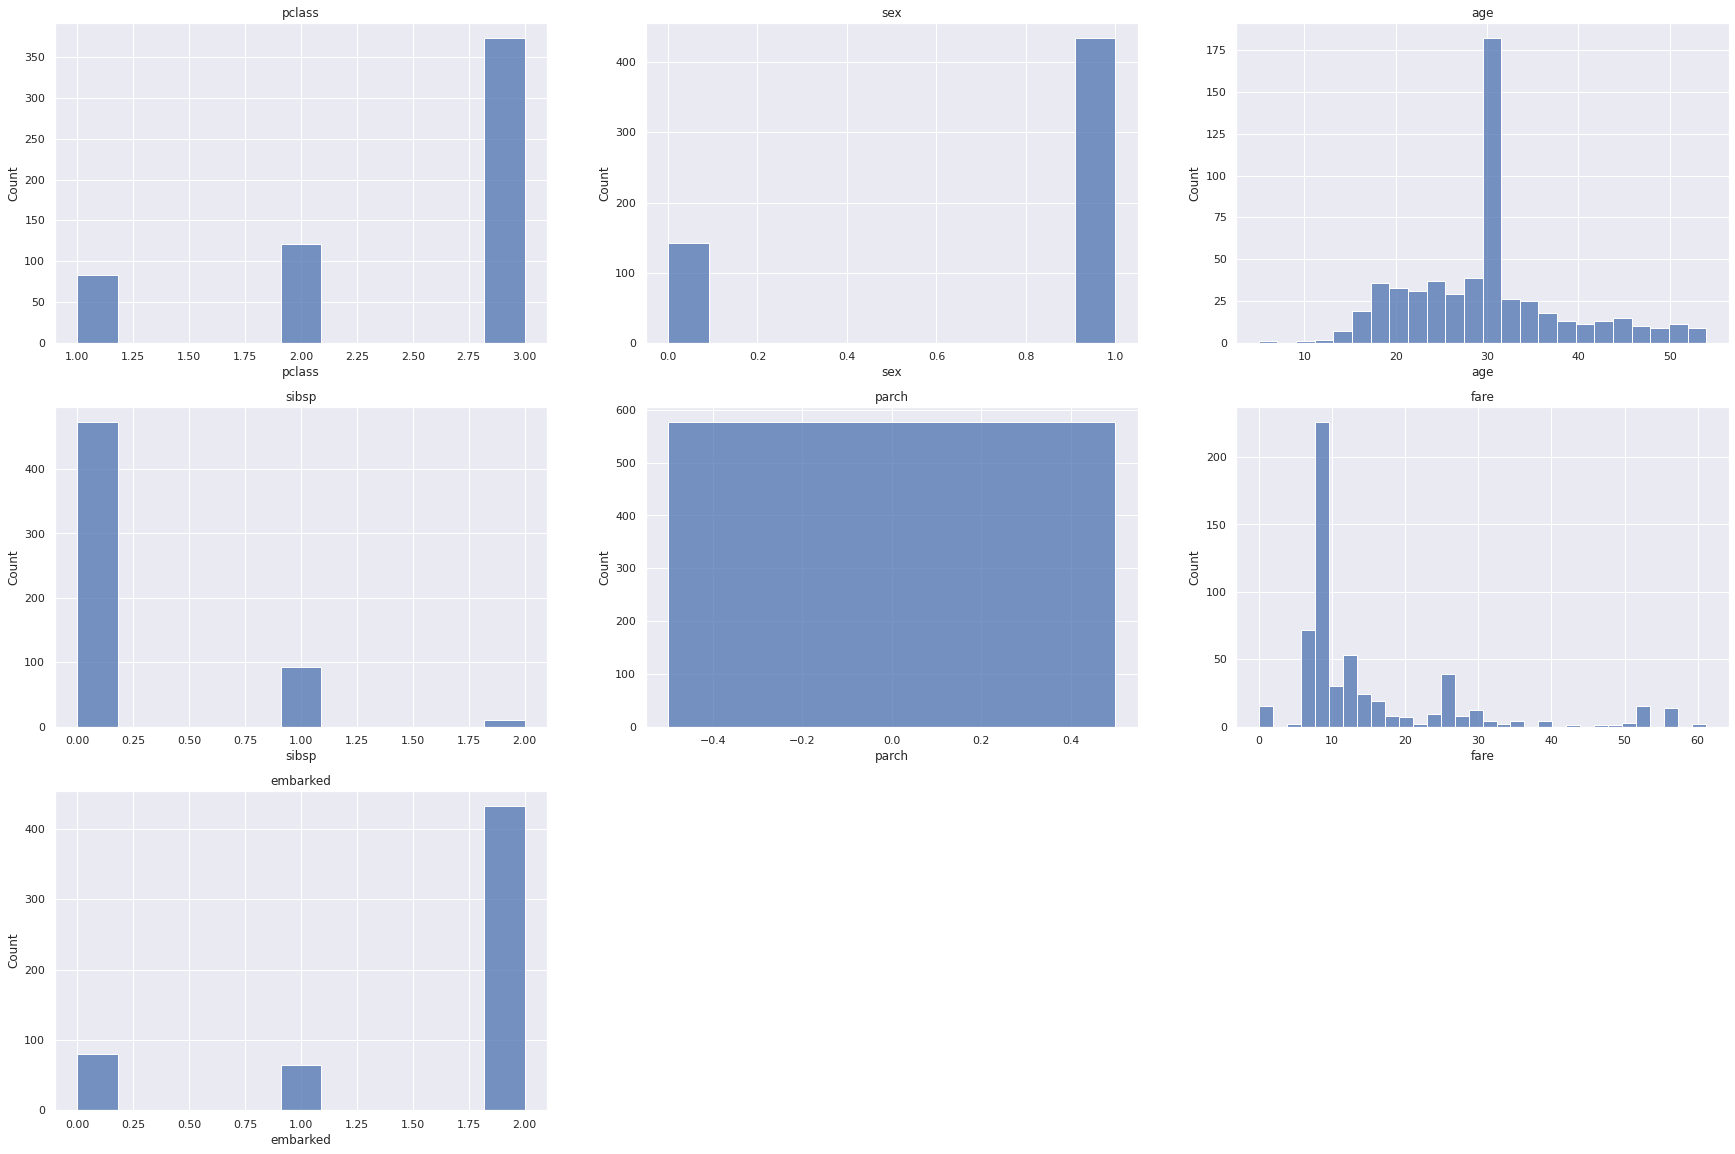

In [68]:
# Ploting the univariate summaries and recording our observations
# make a histogram for each feature column
features_dict = { 'pclass':1, 'sex':2, 'age':3, 'sibsp':4, 'parch':5, 'fare':6,'embarked':7}
plt.figure(figsize=(30,20))

for variable,i in features_dict.items():
  plt.subplot(3,3,i)
  sns.histplot(df[variable])
  sns.set_theme(palette= 'deep', color_codes= False)
  plt.title(variable)

plt.show()

In [69]:
# Ploting the bivariate summaries and recording our observations
# sns.set()

# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 25))

# for col, ax in zip(df.columns.to_list(), axes.flatten()):

#   standard_var = df[col].std()
#   skew = df[col].skew()
#   kurt = df[col].kurt()
#   range = df[col].max() - df[col].min()

#   sns.histplot(df[col],  ax=ax)
#   ax.set_title(f'{col}: Standard Deviation: {standard_var} Skewness: {skew}\n Kurtosis: {kurt} Range : {range}')

# plt.tight_layout()

Bivariate analysis

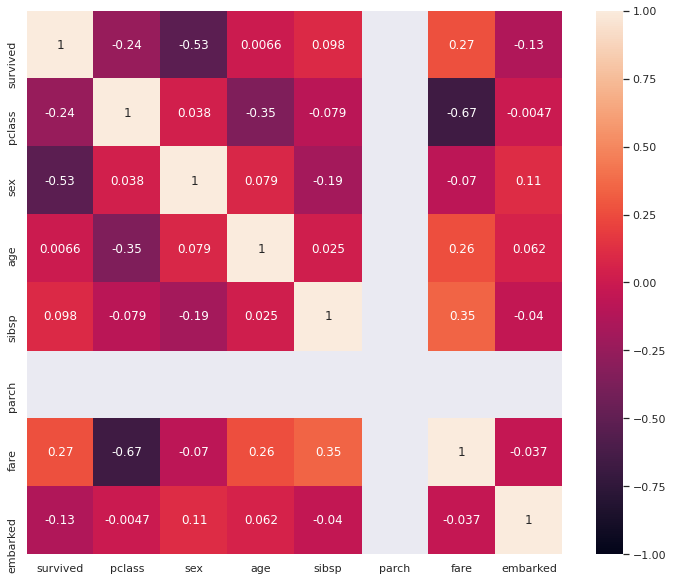

In [70]:
# Check for multicollinearity

corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [ ]:
# Data Reduction
#

## 7. Implementing the Solution

####**80% training & 20% testing model**

In [42]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [78]:
# Implementing the Solution
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
X = df.drop(['survived'], axis=1)
y = df['survived']

# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

predicted_probability = classifier.predict_proba(X_test)
predicted_probability_1 = predicted_probability[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test,predicted_probability_1 ))

[[67 12]
 [16 21]]
Accuracy0.7586206896551724
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        79
           1       0.64      0.57      0.60        37

    accuracy                           0.76       116
   macro avg       0.72      0.71      0.71       116
weighted avg       0.75      0.76      0.75       116

ROC SCORE 0.7456380431063976


Summary 80/20

- Accuracy score: 0.7586
- Roc-auc - 0.7486
- Confusion matrix- 67 TN & 21 TP, with 28 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 81% precision for class 0 and 64% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 85% recall for class 0 and 67% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.83 for class0 and 0.60 for class 1.
Conclusion, the model has good precision and poor recall for class 0 and good presicion and poor recall for class 1 with generally good f1 scores for both classes.

####**70% Training & 30% Testing**

In [77]:
# Implementing the Solution
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
X = df.drop(['survived'], axis=1)
y = df['survived']

# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

predicted_probability = classifier.predict_proba(X_test)
predicted_probability_1 = predicted_probability[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test,predicted_probability_1 ))

[[108  12]
 [ 18  36]]
Accuracy0.8275862068965517
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       120
           1       0.75      0.67      0.71        54

    accuracy                           0.83       174
   macro avg       0.80      0.78      0.79       174
weighted avg       0.82      0.83      0.82       174

ROC SCORE 0.8324845679012347


Summary 70/30

- Accuracy score: 0.8275
- Roc-auc - 0.8324
- Confusion matrix- 108 TN & 36 TP, with 30 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 86% precision for class 0 and 75% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 90% recall for class 0 and 67% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.81 for class0 and 0.71 for class 1.
Conclusion, the model has good precision and poor recall for class 0 and good presicion and poor recall for class 1 with generally good f1 scores for both classes.

####**60% Training & 40% Testing**

In [76]:
# Implementing the Solution
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
X = df.drop(['survived'], axis=1)
y = df['survived']

# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# The final step is to make predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

predicted_probability = classifier.predict_proba(X_test)
predicted_probability_1 = predicted_probability[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test,predicted_probability_1 ))

[[151  18]
 [ 29  33]]
Accuracy0.7965367965367965
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       169
           1       0.65      0.53      0.58        62

    accuracy                           0.80       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.79      0.80      0.79       231

ROC SCORE 0.8177610230960106


Summary 80/20

- Accuracy score: 0.79
- Roc-auc - 0.81
- Confusion matrix- 151 TN & 33 TP, with 47 incorrect classification.

Precision is a metric that quantifies the number of correct positive predictions made.Precision, therefore, calculates the accuracy for the minority class.It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.Precision evaluates the fraction of correct classified instances among the ones classified as positive.

- The model has a 84% precision for class 0 and 65% precision for class 1.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. For imbalanced learning, recall is typically used to measure the coverage of the minority class. In an imbalanced classification problem with two classes, recall is calculated as the number of true positives divided by the total number of true positives and false negatives.

- The model has a 89% recall for class 0 and 53% recall for class 1.
Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus. Recall: Appropriate when minimizing false negatives is the focus.

F-Measure provides a way to combine both precision and recall into a single measure that captures both properties.Once precision and recall have been calculated for a binary or multiclass classification problem, the two scores can be combined into the calculation of the F-Measure.

*F-Measure = (2 * Precision * Recall) / (Precision + Recall) * This is the harmonic mean of the two fractions. This is sometimes called the F-Score or the F1-Score and might be the most common metric used on imbalanced classification problems. The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data. Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0

The model has a f1 score 0.87 for class0 and 0.58 for class 1.
Conclusion, the model has good precision and poor recall for class 0 and good presicion and poor recall for class 1 with generally good f1 scores for both classes.

The 70/30 model gives us the best accuracy and ROC-AUC score.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [83]:
# Reviewing the Solution 
# Implementing the Solution
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
X1 = df.drop(['survived'], axis=1)
y1 = df['survived']

# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train70, X_test70, y_train70, y_test70 = train_test_split(X1, y1, test_size=0.30)

# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train70)

X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean', leaf_size=20)
classifier.fit(X_train70, y_train70)

# The final step is to make predictions on our test data
y_pred70 = classifier.predict(X_test70)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test70, y_pred70))
print('Accuracy' + str(accuracy_score(y_test70, y_pred70)))
print(classification_report(y_test70, y_pred70))

predicted_probability70 = classifier.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

[[105  21]
 [ 16  32]]
Accuracy0.7873563218390804
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.60      0.67      0.63        48

    accuracy                           0.79       174
   macro avg       0.74      0.75      0.74       174
weighted avg       0.79      0.79      0.79       174

ROC SCORE 0.8234953703703702


In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': np.arange(5, 11),
    'weights': ['uniform', 'distance'],
    'leaf_size': np.arange(20, 60, 10),
    'metric': ['euclidean','manhattan'],
    'algorithm': ['kd_tree','ball_tree','brute']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=parameters, scoring='accuracy', cv=5)

In [84]:
grid_knn.fit(X_train70, y_train70)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'brute'],
                         'leaf_size': array([20, 30, 40, 50]),
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [85]:
grid_knn.best_score_

0.811604938271605

In [86]:
grid_knn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [89]:
# Reviewing the Solution 
# Implementing the Solution
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
X1 = df.drop(['survived'], axis=1)
y1 = df['survived']

# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train70, X_test70, y_train70, y_test70 = train_test_split(X1, y1, test_size=0.30)

# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train70)

X_train70 = scaler.transform(X_train70)
X_test70 = scaler.transform(X_test70)

# Using the best parameters to train the model
# {'algorithm': 'kd_tree',
#  'leaf_size': 30,
#  'metric': 'manhattan',
#  'n_neighbors': 5,
#  'weights': 'uniform'}

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier_best = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan', leaf_size=30, algorithm= 'kd_tree')
classifier_best.fit(X_train70, y_train70)

# The final step is to make predictions on our test data
y_pred70 = classifier_best.predict(X_test70)

# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test70, y_pred70))
print('Accuracy' + str(accuracy_score(y_test70, y_pred70)))
print(classification_report(y_test70, y_pred70))

predicted_probability70 = classifier.predict_proba(X_test70)
predicted_probability70_1 = predicted_probability70[:, 1]
from sklearn.metrics import roc_auc_score

print('ROC SCORE',roc_auc_score(y_test70,predicted_probability70_1 ))

[[111  13]
 [ 18  32]]
Accuracy0.8218390804597702
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       124
           1       0.71      0.64      0.67        50

    accuracy                           0.82       174
   macro avg       0.79      0.77      0.78       174
weighted avg       0.82      0.82      0.82       174

ROC SCORE 0.8762096774193547


The best parameters to use are:
***'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'uniform'***

####Making the predictions using the test data

In [90]:
test = pd.read_csv('/content/test (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
# Changing all column names to lower case
test.columns = test.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [94]:
#Dropping columns we will not need.
test = test.drop(['passengerid', 'name', 'ticket','cabin'], axis = 1)
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [95]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
test['sex']= label_encoder.fit_transform(test['sex']) 
test['embarked'] = test['embarked'].astype('category').cat.codes
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [97]:
# Identifying the Missing Data
test.isnull().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [99]:
# Filling missing values in the sex column with mode
test.fare.fillna(test.fare.mode()[0], inplace = True)

# Filling missing values in the sex column with mode
test.age.fillna(test.age.mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [100]:
# The final step is to make predictions on our test data
test_prediction = classifier_best.predict(test)
test_prediction


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?